Trying to make simulation for Andromeda

In [33]:
from rocketpy import Environment, SolidMotor, Rocket, Flight

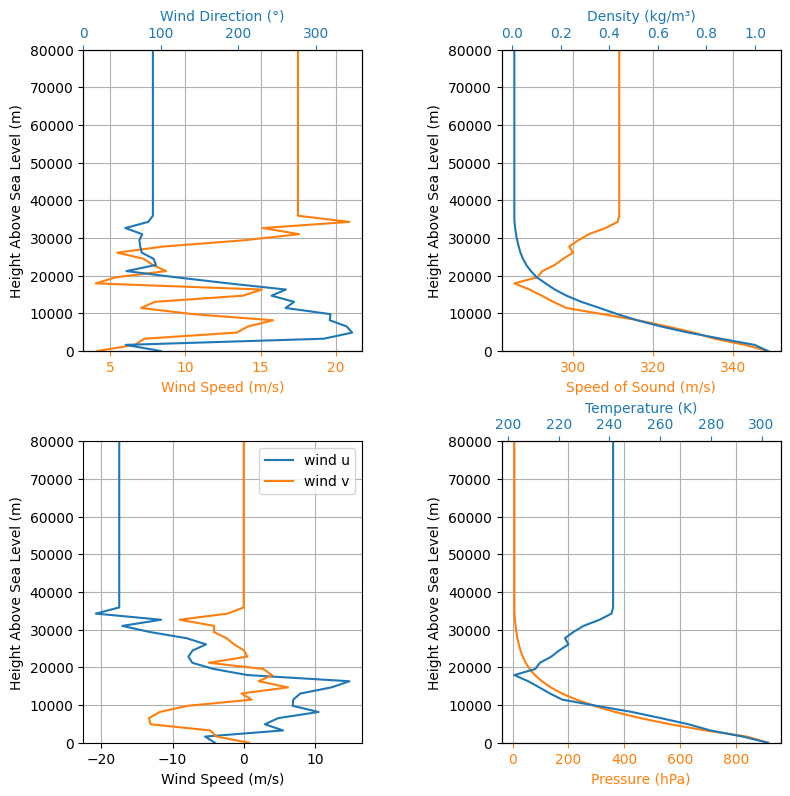

In [34]:
url = "https://weather.uwyo.edu/cgi-bin/sounding?region=naconf&TYPE=TEXT%3ALIST&YEAR=2025&MONTH=06&FROM=1200&TO=1200&STNM=72265"

env = Environment()
env.set_atmospheric_model(type="wyoming_sounding", file=url)
env.plots.atmospheric_model()

Nozzle Details
Nozzle Radius: 0.03429 m
Nozzle Throat Radius: 0.01524 m

Grain Details
Number of Grains: 6
Grain Spacing: 0 m
Grain Density: 1579.9 kg/m3
Grain Outer Radius: 0.04115 m
Grain Inner Radius: 0.01905 m
Grain Height: 0.147955 m
Grain Volume: 0.001 m3
Grain Mass: 0.977 kg

Motor Details
Total Burning Time: 4.136 s
Total Propellant Mass: 5.862 kg
Structural Mass Ratio: 0.133
Average Propellant Exhaust Velocity: 1778.006 m/s
Average Thrust: 2520.007 N
Maximum Thrust: 3097.947 N at 1.69 s after ignition.
Total Impulse: 10422.750 Ns



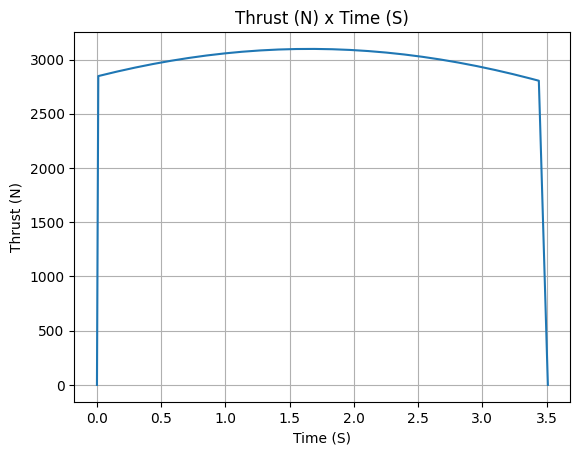

In [35]:
# Motor Definition
Kay2Motor = SolidMotor(
    thrust_source = r".\Raw Data\Andromeda\NEWCOMP.eng",
    dry_mass = 0.9,
    dry_inertia = (0.475, 0.475, 0.007),
    nozzle_radius = 68.58/2000,
    grain_number = 6,
    grain_density = 1579.9,
    grain_outer_radius = 82.3 / 2000,
    grain_initial_inner_radius = 38.1 / 2000,
    grain_initial_height = 0.147955,
    grain_separation = 0,
    grains_center_of_mass_position=0.508,
    center_of_dry_mass_position=0.4826,
    nozzle_position=0,
    burn_time = 4.136,
    throat_radius = 0.01524,
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)
Kay2Motor.info()

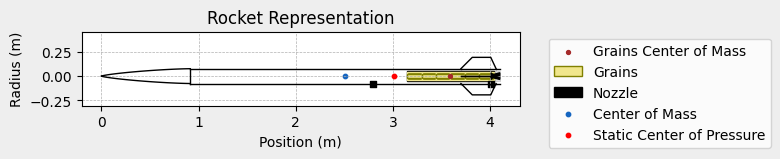

In [36]:
#Defining a Rocket
Andromeda = Rocket(
    radius = 152.4/2000,
    mass = 23.6265,
    inertia = (32.625, 32.625, 0.091),
    power_off_drag="Raw Data/Andromeda/CDPowerOff.csv",
    power_on_drag="Raw Data/Andromeda/CDPowerOn.csv",
    center_of_mass_without_motor=2.1983446,
    coordinate_system_orientation="nose_to_tail",
)
Andromeda.add_motor(Kay2Motor, position=4.1)

rail_buttons = Andromeda.set_rail_buttons(
    upper_button_position=2.794,
    lower_button_position = 4.0132,
    angular_position=0,
)

fin_set = Andromeda.add_trapezoidal_fins(
    n=4,
    root_chord=0.36195,
    tip_chord = 0.1905,
    span = 0.11684,
    position = 3700/1000,
    cant_angle = 0,
    sweep_angle = 45,
)

nose_cone = Andromeda.add_nose(
    length = 0.9144, kind="von karman", position = 0
)

Drogue = Andromeda.add_parachute(
    "Drogue", cd_s=1.00584, trigger="apogee", sampling_rate=100, lag=0
)

Main = Andromeda.add_parachute(
    "Main", cd_s=2.34696, trigger=304.8, sampling_rate=100, lag=0
)
Andromeda.draw()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 872.00 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: -0.999 | e1: 0.051 | e2: 0.000 | e3: 0.000
Euler Angles - Spin φ : 360.00° | Nutation θ: -5.80° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 3.284 c


Surface Wind Conditions

Frontal Surface Wind Speed: 0.71 m/s
Lateral Surface Wind Speed: 4.05 m/s


Launch Rail

Launch Rail Length: 5.1 m
Launch Rail Inclination: 84.20°
Launch Rail Heading: 0.00°


Rail Departure State

Rail Departure Time: 0.304 s
Rail Departure Velocity: 25.642 m/s
Rail Departure Stability Margin: 3.400 c
Rail Departure Angle of Attack: 10.068°
Rail Departure Thrust-Weight Ratio: 9.983
Rail Departure Reynolds Number: 2.245e+05


Burn out State

Burn out time: 4.136 s
Altitude at burn out: 1613.772 m (ASL) | 741.772 m (AGL)
Rocket speed at burn out: 289.141 m/s
Freestream veloc

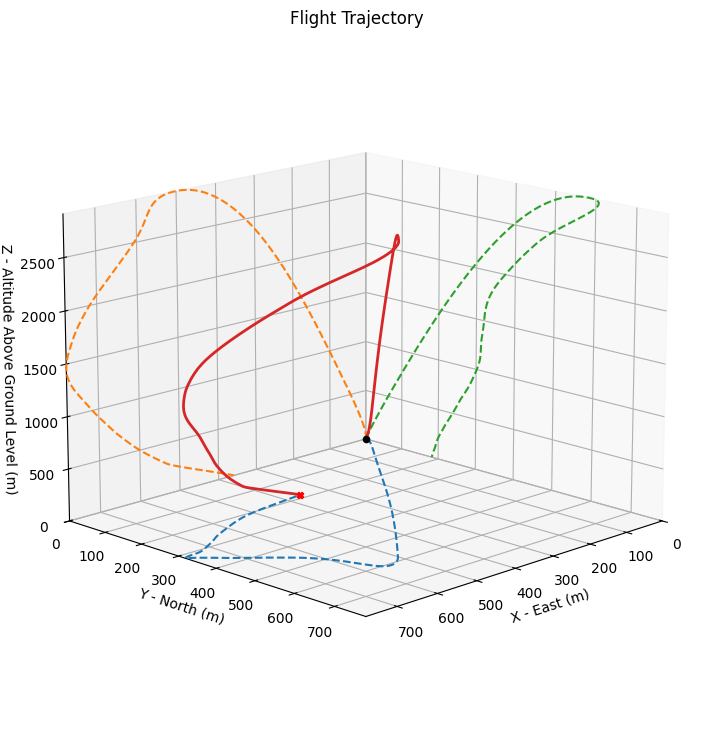



Trajectory Kinematic Plots



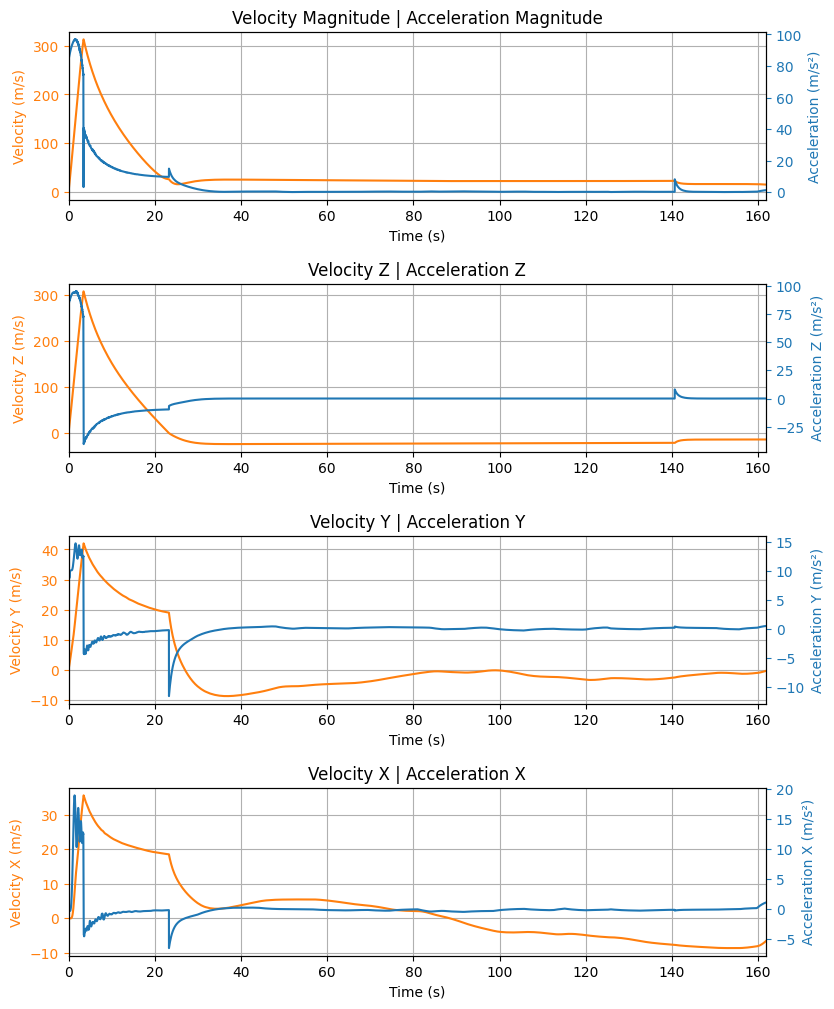



Angular Position Plots



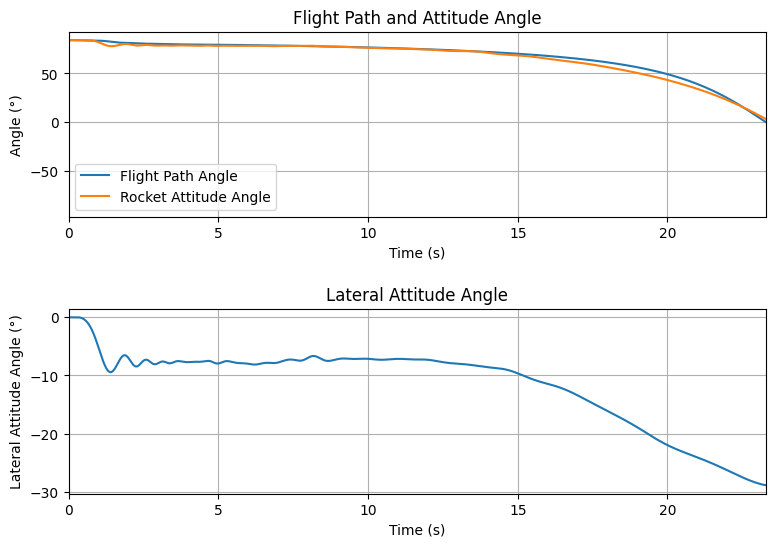



Path, Attitude and Lateral Attitude Angle plots



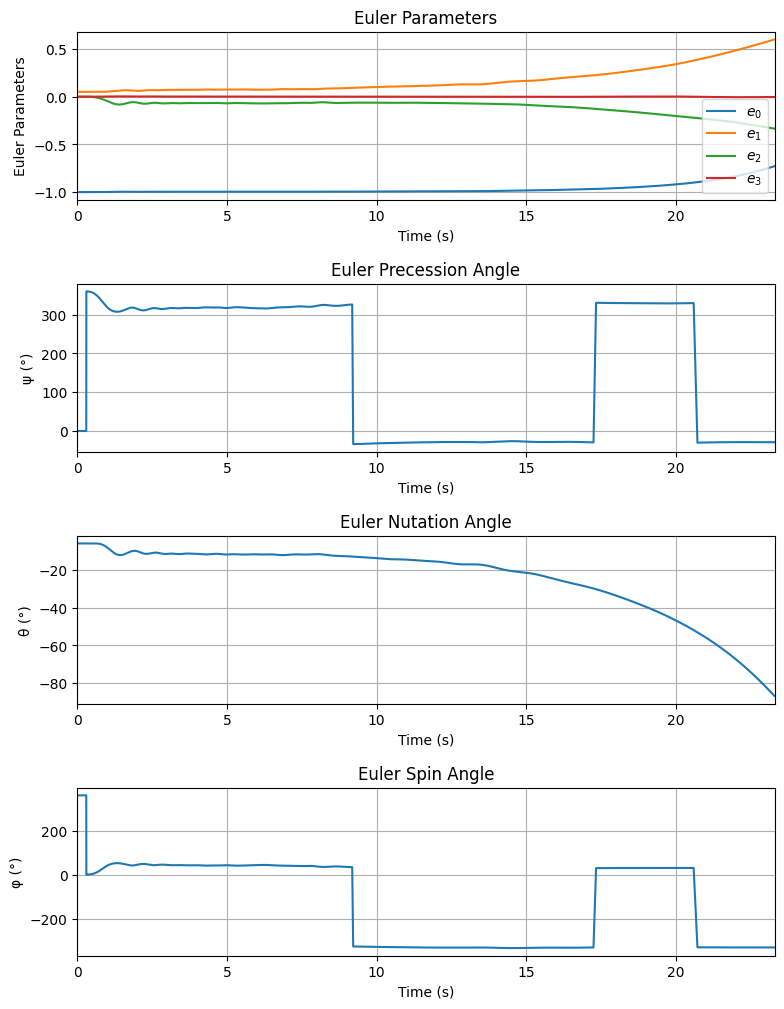



Trajectory Angular Velocity and Acceleration Plots



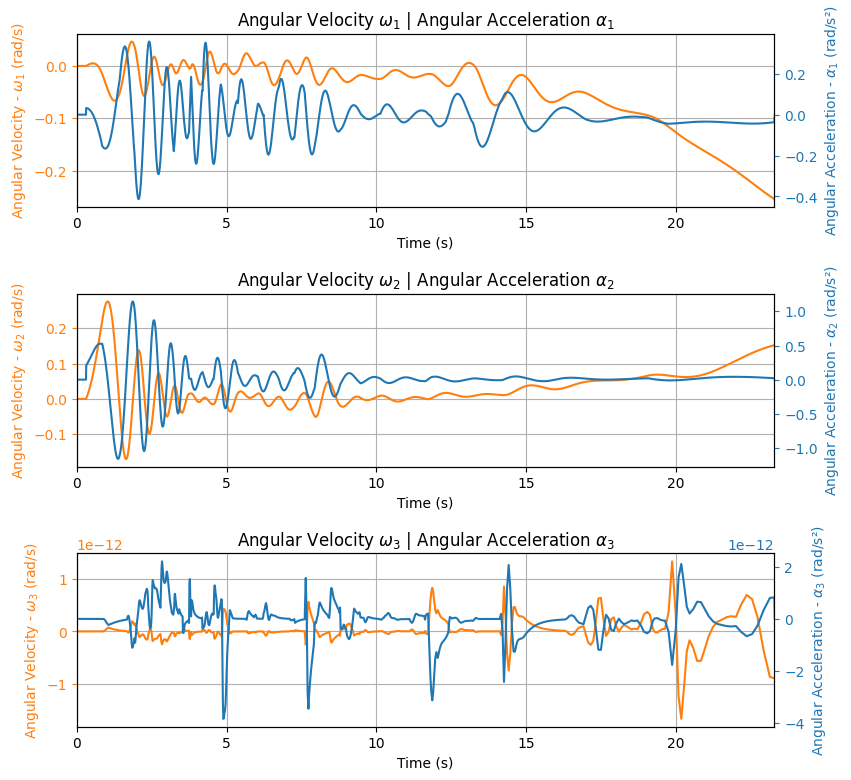



Aerodynamic Forces Plots



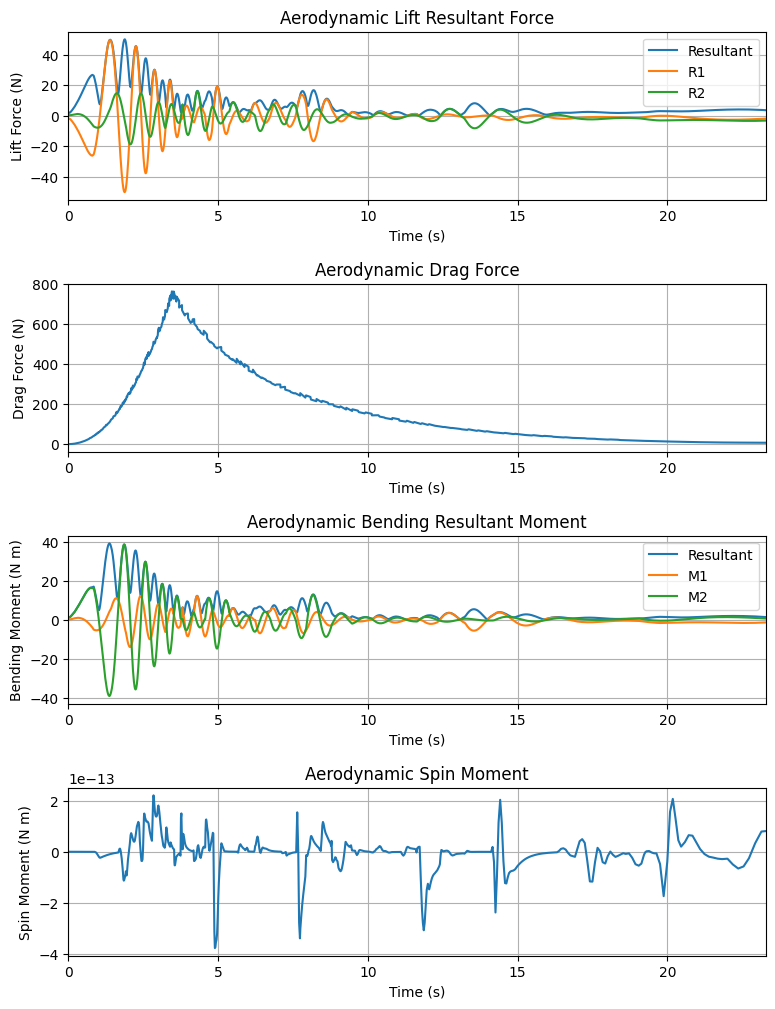



Rail Buttons Forces Plots



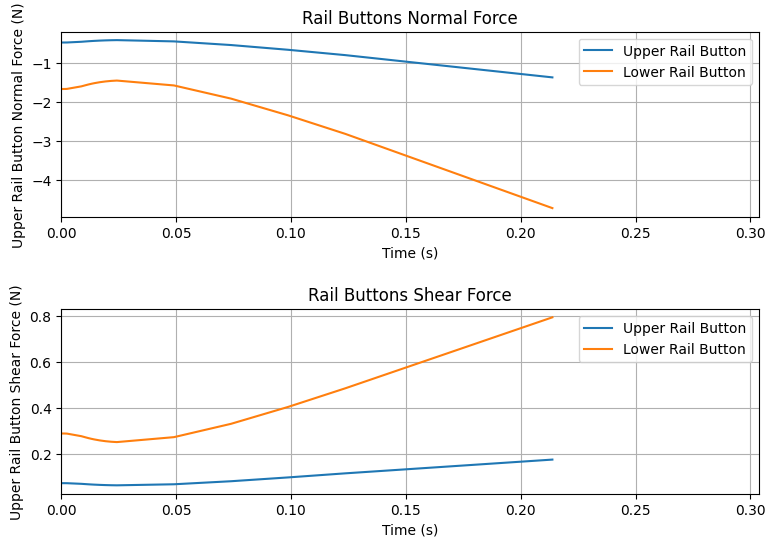



Trajectory Energy Plots



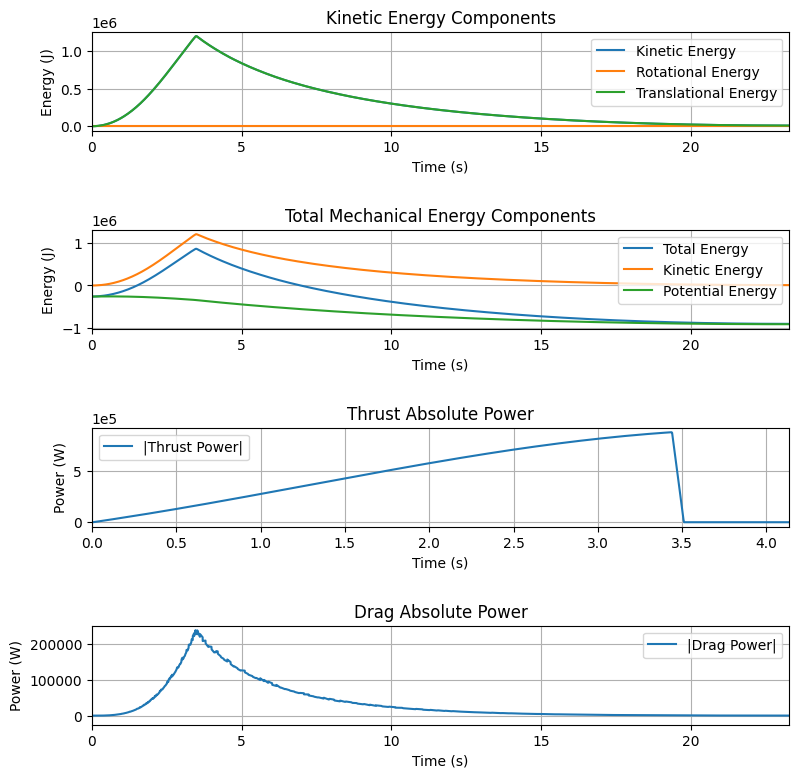



Trajectory Fluid Mechanics Plots



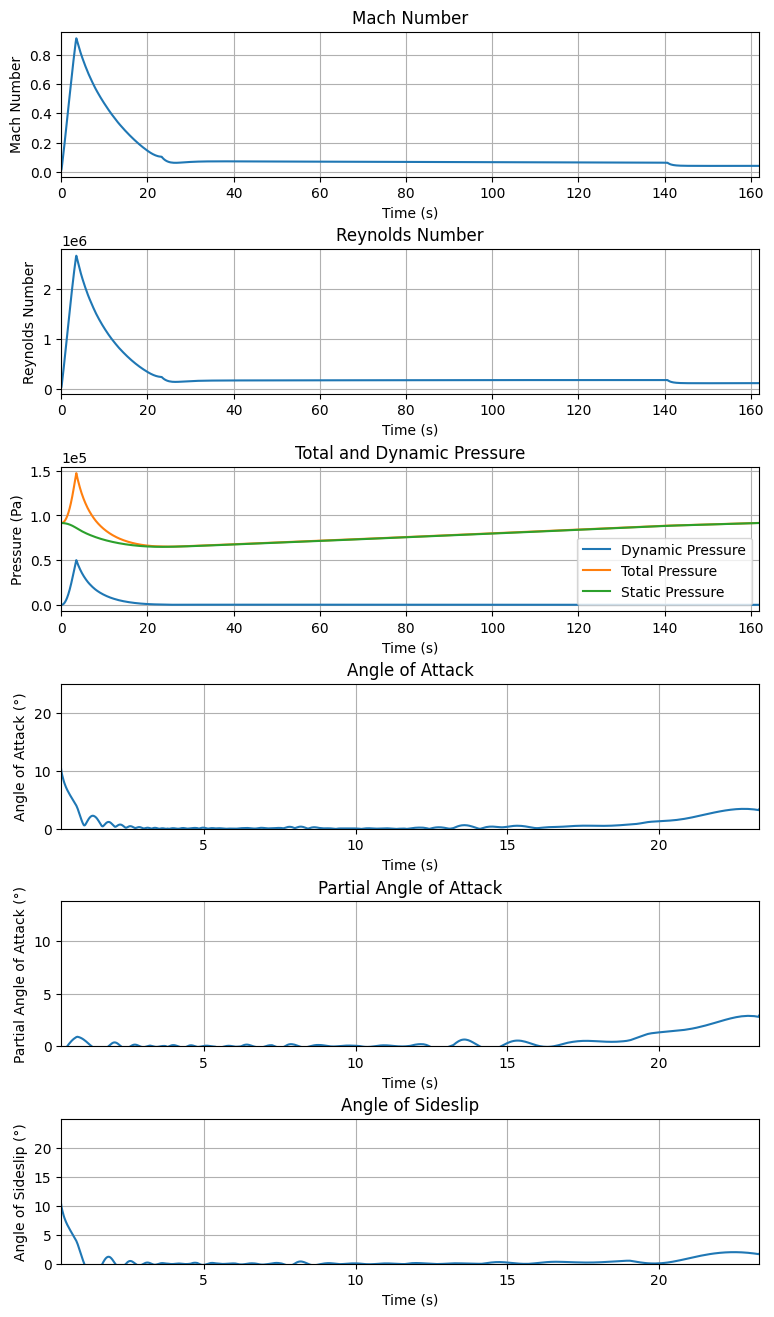



Trajectory Stability and Control Plots



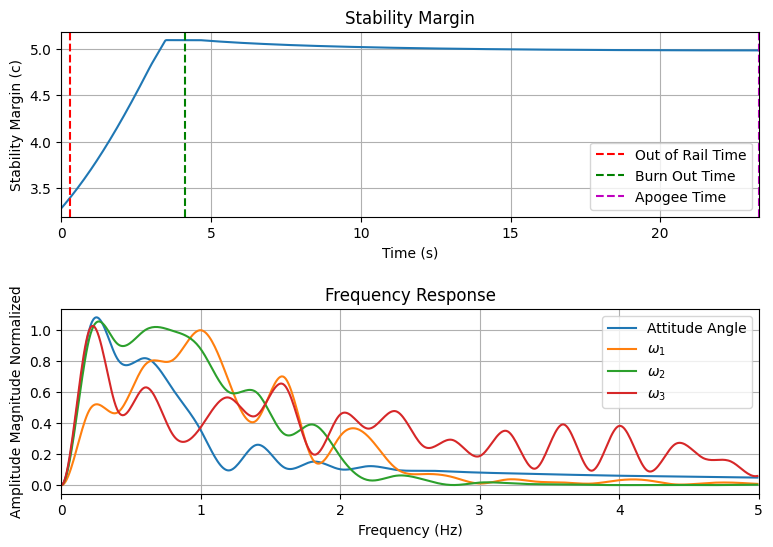



Rocket and Parachute Pressure Plots



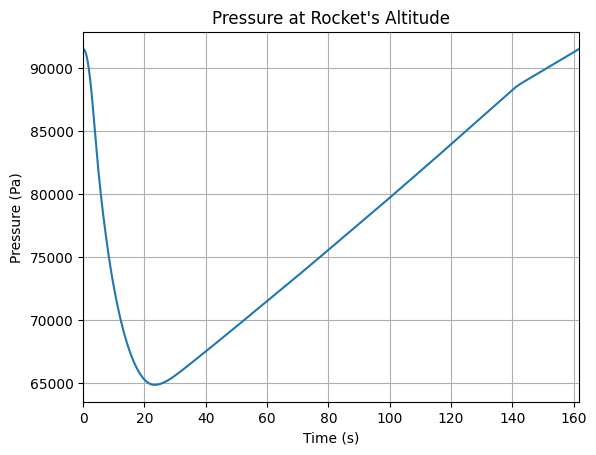


Parachute:  Drogue


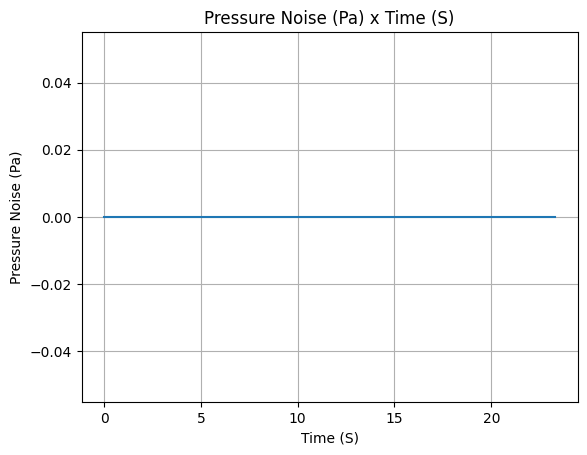

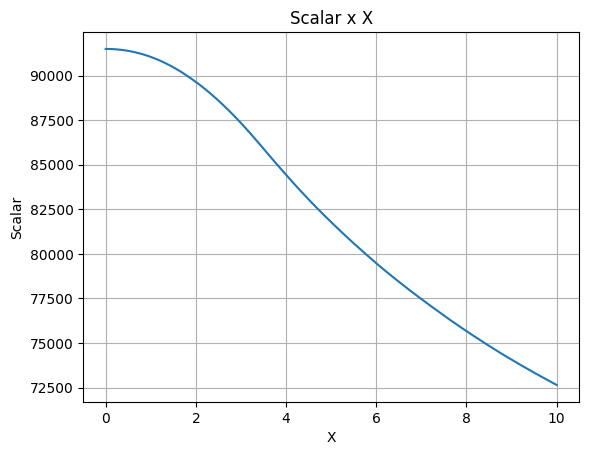

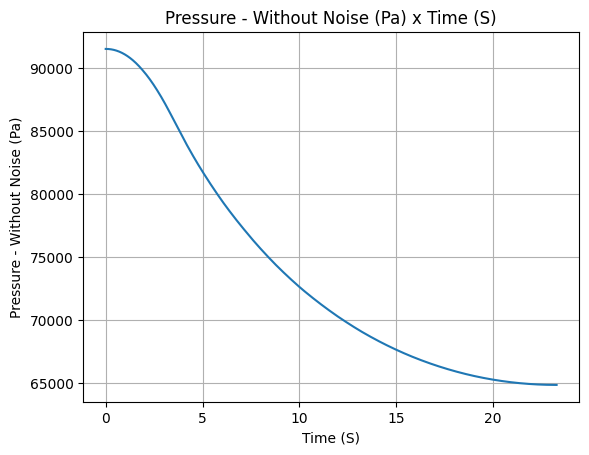


Parachute:  Main


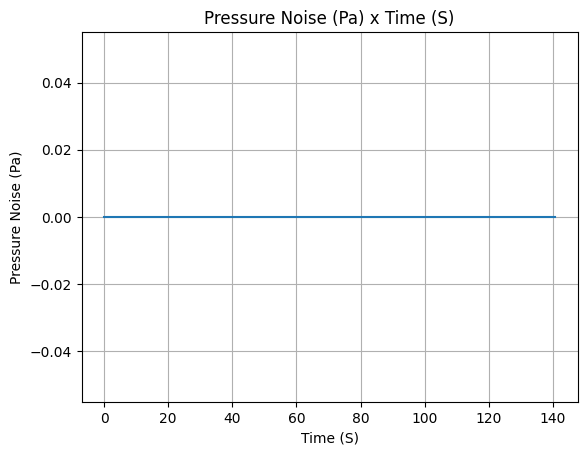

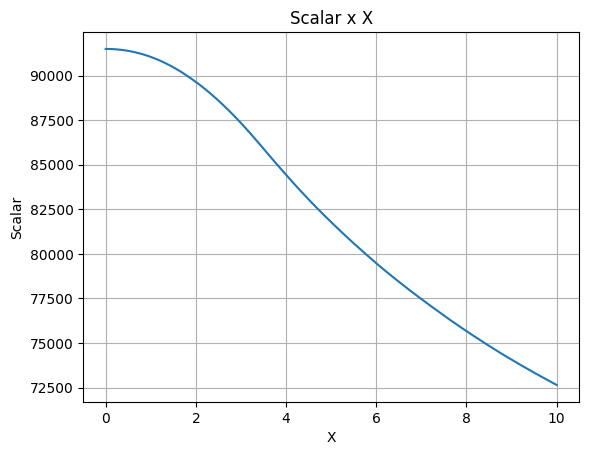

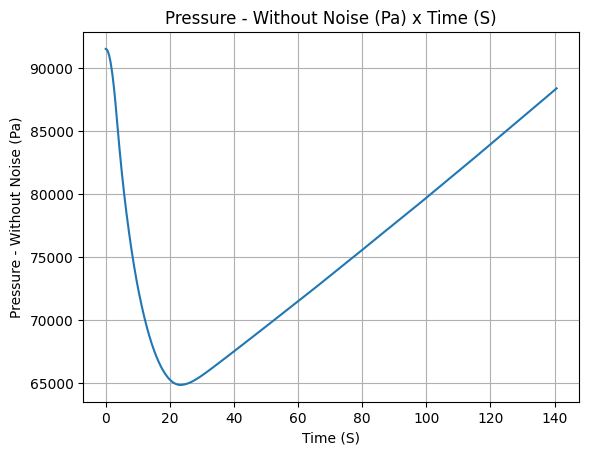

In [37]:
test_flight = Flight(
    rocket = Andromeda, environment=env, rail_length=5.1, inclination=84.2, heading = 0
)
test_flight.all_info()